In [1]:
pip install bing-image-downloader

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!mkdir images


mkdir: cannot create directory ‘images’: File exists


In [4]:
#from bing_image_downloader import downloader
#downloader.download("pretty sunflower",limit=30,output_dir="images", adult_filter_off=True)

In [5]:
#from bing_image_downloader import downloader
#downloader.download("cats",limit=30,output_dir="images", adult_filter_off=True)

In [6]:
#from bing_image_downloader import downloader
#downloader.download("roses",limit=20,output_dir="images", adult_filter_off=True)

In [7]:
#from bing_image_downloader import downloader
#downloader.download("dogs",limit=30,output_dir="images", adult_filter_off=True)

In [8]:
#from bing_image_downloader import downloader
#downloader.download("lotus",limit=30,output_dir="images", adult_filter_off=True)

In [9]:
#from bing_image_downloader import downloader
#downloader.download("tiger",limit=30,output_dir="images", adult_filter_off=True)

In [10]:
#from bing_image_downloader import downloader
#downloader.download("lion",limit=30,output_dir="images", adult_filter_off=True)

In [4]:
import numpy as np
a=np.array([[1,2,3,4,5],[4,5,6,7,8]])
a.ndim

2

In [5]:
#Preprocessing
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

DATADIR='/content/drive/MyDrive/Dataset'
CATEGORIES=['cat','dog','lion','lotus','rose','sunflower','tiger','tulip','cheetahs','apple','banana','kiwi']

for category in CATEGORIES:
  class_num=CATEGORIES.index(category) #Label Encoding the values
  path=os.path.join(DATADIR,category)
  print(path)
  for img in os.listdir(path):

    img_array=imread(os.path.join(path,img))
    
    #plt.imshow(img_array)
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

/content/drive/MyDrive/Dataset/cat
/content/drive/MyDrive/Dataset/dog
/content/drive/MyDrive/Dataset/lion
/content/drive/MyDrive/Dataset/lotus
/content/drive/MyDrive/Dataset/rose
/content/drive/MyDrive/Dataset/sunflower
/content/drive/MyDrive/Dataset/tiger
/content/drive/MyDrive/Dataset/tulip
/content/drive/MyDrive/Dataset/cheetahs
/content/drive/MyDrive/Dataset/apple
/content/drive/MyDrive/Dataset/banana
/content/drive/MyDrive/Dataset/kiwi


In [6]:
target

array([ 0,  0,  0, ..., 11, 11, 11])

In [7]:
flat_data

array([[0.53972305, 0.64786928, 0.83056209, ..., 0.67988479, 0.51125734,
        0.30047059],
       [0.43448366, 0.45801307, 0.41879739, ..., 0.05098039, 0.04705882,
        0.03137255],
       [0.62460131, 0.42314789, 0.28508253, ..., 0.11291503, 0.09395015,
        0.07843137],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.2       , 0.23377259, 0.08950327, ..., 0.03529412, 0.05490196,
        0.07058824],
       [0.34539869, 0.38470588, 0.        , ..., 0.38      , 0.51755556,
        0.09372549]])

In [8]:
target

array([ 0,  0,  0, ..., 11, 11, 11])

<BarContainer object of 12 artists>

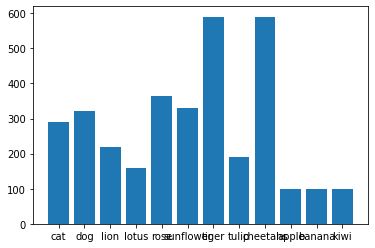

In [9]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [10]:
#Split data in Training and Testing sets

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=.3)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [12]:
#Dimension of dataset

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((1641, 67500), (1641,))
((704, 67500), (704,))
((1005, 67500), (1005,))


In [13]:
from tensorflow.keras.utils import to_categorical

#One Hot Encoding
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [14]:
#verifying the dimension after one hot encoding

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((1641, 67500), (1641, 12))
((704, 67500), (704, 12))
((1005, 67500), (1005, 12))


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.applications import VGG19 #For Transfer Learning
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout

#Image Data Augmentation

train_generator=ImageDataGenerator(rotation_range=2,horizontal_flip=True,width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2, zoom_range=.1)
val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,width_shift_range=0.2,
    height_shift_range=0.2, zoom_range=.1)
test_generator=ImageDataGenerator(rotation_range=2,horizontal_flip=True,width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2, zoom_range=.1)

#Fitting the augmentation defined above to the data

train_generator.fit(x_train.reshape(1641,150,150,3))
val_generator.fit(x_val.reshape(704,150,150,3))
test_generator.fit(x_test.reshape(1005,150,150,3))

In [16]:
#Learning Rate Annealer

lrr=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=.01,paitence=10,min_lr=1e-5)

In [17]:
y_train.shape

(1641, 12)

In [18]:
#Defining the VGG Convolutional Neural Net

base_model = VGG19(include_top = False, weights = 'imagenet', input_shape = (150,150,3), classes = y_train.shape[1])

In [19]:
#Adding the final layers to the above base models where the actual classification is done in the dense layers

model=Sequential()
model.add(base_model)
model.add(Flatten())

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
Total params: 20,024,384
Trainable params: 20,024,384
Non-trainable params: 0
_________________________________________________________________


In [21]:
#Adding the Dense layers along with activation and batch normalisation

model.add(Dense(1024,activation=("relu"),input_dim=512))
model.add(Dense(512,activation=('relu')))
model.add(Dense(256,activation=('relu')))

model.add(Dense(128,activation=('relu')))
#model.add(Dense(10,activation=('softmax')))
model.add(Dense(12,activation=('softmax')))

#Checking the final model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1024)              8389632   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 12)                1

In [22]:
#initializing the hyperparameters

batch_size=10
epochs=20
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1024)              8389632   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 12)                1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
#Training the model
model.fit_generator(train_generator.flow(x_train.reshape(1641,150,150,3), y_train, batch_size= batch_size),epochs = epochs, 
                    steps_per_epoch = x_train.shape[0]//batch_size,
                    validation_data = val_generator.flow(x_val.reshape(704,150,150,3), y_val, batch_size = batch_size), 
                    validation_steps = 250,callbacks=[lrr], verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
164/164 [==============================] - 64s 318ms/step - loss: 1.7623 - accuracy: 0.4090 - val_loss: 1.2676 - val_accuracy: 0.5270 - lr: 0.0010
Epoch 2/20
164/164 [==============================] - 41s 248ms/step - loss: 0.9377 - accuracy: 0.6658 - lr: 0.0010
Epoch 3/20
164/164 [==============================] - 41s 249ms/step - loss: 0.7825 - accuracy: 0.7535 - lr: 0.0010
Epoch 4/20
164/164 [==============================] - 41s 249ms/step - loss: 0.5947 - accuracy: 0.8032 - lr: 0.0010
Epoch 5/20
164/164 [==============================] - 41s 249ms/step - loss: 0.4240 - accuracy: 0.8627 - lr: 0.0010
Epoch 6/20
164/164 [==============================] - 41s 249ms/step - loss: 0.4110 - accuracy: 0.8670 - lr: 0.0010
Epoch 7/20
164/164 [==============================] - 41s 250ms/step - loss: 0.3440 - accuracy: 0.8939 - lr: 0.0010
Epoch 8/20
164/164 [==============================] - 41s 250ms/step - loss: 0.3239 - accuracy: 0.8982 - lr: 0.0010
Epoch 9/20
164/164 [==========

In [49]:
#Making prediction
#y_pred=model.predict_classes(x_test.reshape(596,150,150,3))
#y_true=np.argmax(y_test,axis=1)
#y_pred
predict_x=model.predict(x_test.reshape(1005,150,150,3)) 
y_pred=np.argmax(predict_x,axis=1)
y_true=np.argmax(y_test,axis=1)
y_pred
import sklearn
acc = sklearn.metrics.accuracy_score(np.array(y_true), 
                                     np.array(y_pred))
print(acc)

0.9263681592039801


In [25]:
model.save('Model.hdf5')

Enter your URL:https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ3MlsOKL2FP1ONJgiU4BMXyaROySifr4NBnA&usqp=CAU
(163, 310, 3)
PREDICTED OUTPUT: dog


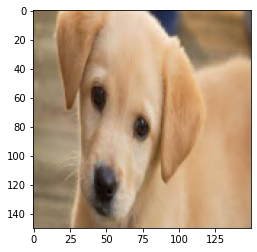

In [47]:
#Testing a brand new Image
flat_data=[]
url=input("Enter your URL:")
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)

print(img.shape)
plt.imshow(img_resized)
#y_out=model.predict_classes(flat_data.reshape(1,150,150,3))
#np.array(y_out)
#y=CATEGORIES[y_out[0]]
#print(f'PREDICTED OUTPUT: {y}')
predict_x=model.predict(flat_data.reshape(1,150,150,3)) 
y_out=np.argmax(predict_x,axis=1)
np.array(y_out)
y=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y}')